DSA MAIN PROJECT BATCH 2 GROUP 5

**ANALYSIS AND PREDICTION OF HOTEL BOOKING USING MACHINE LEARNING**

In [ ]:
#Importing Relevant Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
import plotly.express as px

Loading the Dataset

In [ ]:
data=pd.read_csv('hotel_booking.csv')

### Checking the Basic details

In [ ]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [ ]:
#Checking Unique values in assisgned column
data['assigned_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K'],
      dtype=object)

In [ ]:
data.shape

(119390, 36)

In [ ]:
data['reserved_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [ ]:
print("Number of rows is",data.shape[0])
print("Number of columns is",data.shape[1])

Number of rows is 119390
Number of columns is 36


In [ ]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

**Column information**

***1) Hotel***

H1: Resort hotel

H2: City hotel

***2) is_canceled***

1: Canceled

0: Not canceled

***3) lead_time***

No of days that elapsed between entering date of booking into property management system and arrival date

***4) arrival_date_year***

Year of arrival date (2015-2017)

***5) arrival_date_month***

Month of arrival date (Jan - Dec)

***6) arrival_date_week_number***

Week number of year for arrival date (1-53)

***7) arrival_date_day_of_month***

Day of arrival date

***8) stays_in_weekend_nights***

No of weekend nights (Sat/Sun) the guest stayed or booked to stay at the hotel

***9) stays_in_week_nights***

No of week nights (Mon - Fri) the guest stayed or booked to stay at the hotel

***10) Adults***

Number of Adults 

***11) Children***

Number of Children

***12) Babies***

Number of babies

***13) Meal***

Type of meal booked. 

Undefined/SC – no meal package; 

BB – Bed & Breakfast;

HB – Half board (breakfast and one other meal – usually dinner); 

FB – Full board (breakfast, lunch and dinner)
country

***14) Country***

Country of the customer 

***15) market_segment***

(a group of people who share one or more common characteristics, lumped together for marketing purposes)

TA: Travel agents

TO: Tour operators

***16) distribution_channel***

(A distribution channel is a chain of businesses or intermediaries through which a good or service passes until it reaches the final buyer or the end consumer)

TA: Travel agents

TO: Tour operators

***17) is_repeated_guest*** 
(value indicating if the booking name was from repeated guest)

1: Yes

0: No

***18) previous_cancellations***

Number of previous bookings that were cancelled by the customer prior to the current booking

***19) previous_bookings_not_canceled***

Number of previous bookings not cancelled by the customer prior to the current booking

***20) reserved_room_type***

Code of room type reserved. Code is presented instead of designation for anonymity reasons.

***21) assigned_room_type***

Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.

***22) booking_changes***

Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

***23) deposit_type***
Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:

No Deposit – no deposit was made;
 
Non Refund – a deposit was made in the value of the total stay cost;

Refundable – a deposit was made with a value under the total cost of stay.

***24) agent***

ID of the travel agency that made the booking

***25) company***

ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons

***26) day_in_waiting_list***

Number of days the booking was in the waiting list before it was confirmed to the customer

***27) customer_type***

Contract - when the booking has an allotment or other type of contract associated to it;

Group – when the booking is associated to a group;

Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;

Transient-party – when the booking is transient, but is associated to at least other transient booking

***28) adr (average daily rate)***

average daily rate = Sum of all lodging transaction/Total No of Staying nights
 
***29) required_car_parking_spaces***

Number of car parking spaces required by the customer

***30) total_of_special_requests***

Number of special requests made by the customer (e.g. twin bed or high floor)

***31) reservation_status***

Canceled – booking was canceled by the customer;

Check-Out – customer has checked in but already departed;

No-Show – customer did not check-in and did inform the hotel of the reason why

***32) reservation_status_date***

Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

***33) name***

Name of the customer

***34) email***

Email id of the customer

***35) phone_number***

Phone number of the customer

***36) credit_card***

Credit card of the customer

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
#Checking for null values
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
#Dataset contains null values in country, agent and company columns

In [ ]:
pct_missing_val=data.isna().sum()/data.shape[0]*100
print("Percentage of missing values is ",round(pct_missing_val,2))

Percentage of missing values is  hotel                              0.00
is_canceled                        0.00
lead_time                          0.00
arrival_date_year                  0.00
arrival_date_month                 0.00
arrival_date_week_number           0.00
arrival_date_day_of_month          0.00
stays_in_weekend_nights            0.00
stays_in_week_nights               0.00
adults                             0.00
children                           0.00
babies                             0.00
meal                               0.00
country                            0.41
market_segment                     0.00
distribution_channel               0.00
is_repeated_guest                  0.00
previous_cancellations             0.00
previous_bookings_not_canceled     0.00
reserved_room_type                 0.00
assigned_room_type                 0.00
booking_changes                    0.00
deposit_type                       0.00
agent                             13.69
company

In [ ]:
data.duplicated().sum()

0

In [ ]:
#No duplicates present in the data set.

In [ ]:
data.nunique()

hotel                                  2
is_canceled                            2
lead_time                            479
arrival_date_year                      3
arrival_date_month                    12
arrival_date_week_number              53
arrival_date_day_of_month             31
stays_in_weekend_nights               17
stays_in_week_nights                  35
adults                                14
children                               5
babies                                 5
meal                                   5
country                              177
market_segment                         8
distribution_channel                   5
is_repeated_guest                      2
previous_cancellations                15
previous_bookings_not_canceled        73
reserved_room_type                    10
assigned_room_type                    12
booking_changes                       21
deposit_type                           3
agent                                333
company         

In [ ]:
#The columns name,age,mail id,phone number and company mostly may not have an impact on analysis and it contains
#a high number of NaN values.So dropping these columns.

data1=data.drop(['name', 'email','phone-number', 'credit_card','company'],axis=1)

In [ ]:
data1.shape

(119390, 31)

***

### **EXPLORATORY DATA ANALYSIS**

**CORRELATION**

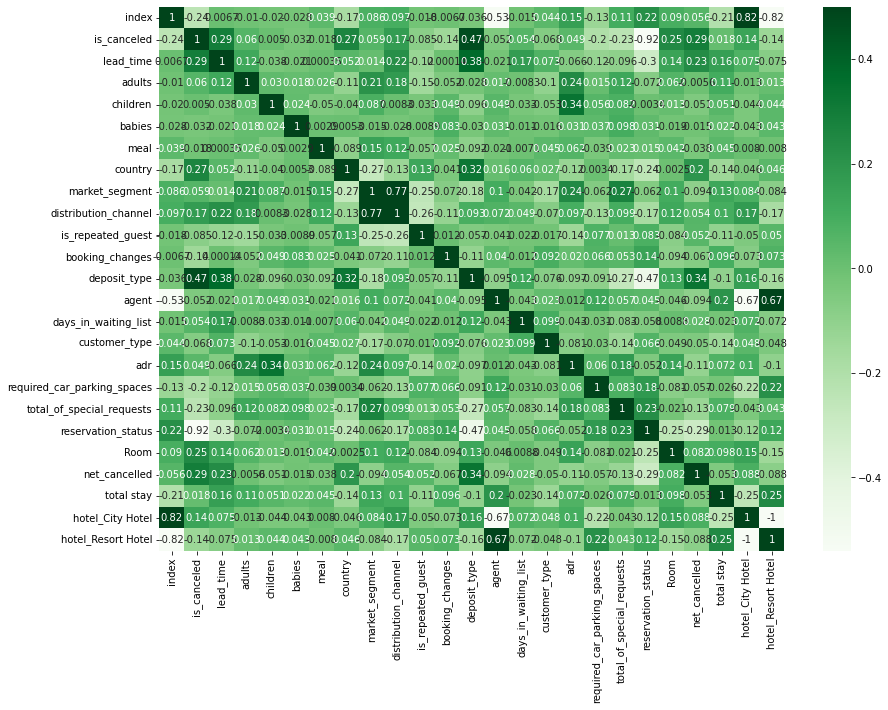

In [ ]:
#Lets see the correlation between all variables in dataset
plt.figure(figsize=(14,10))
sns.heatmap(data1.corr(),annot=True,cmap='Greens',vmax=0.5,vmin=-0.54)
plt.show()

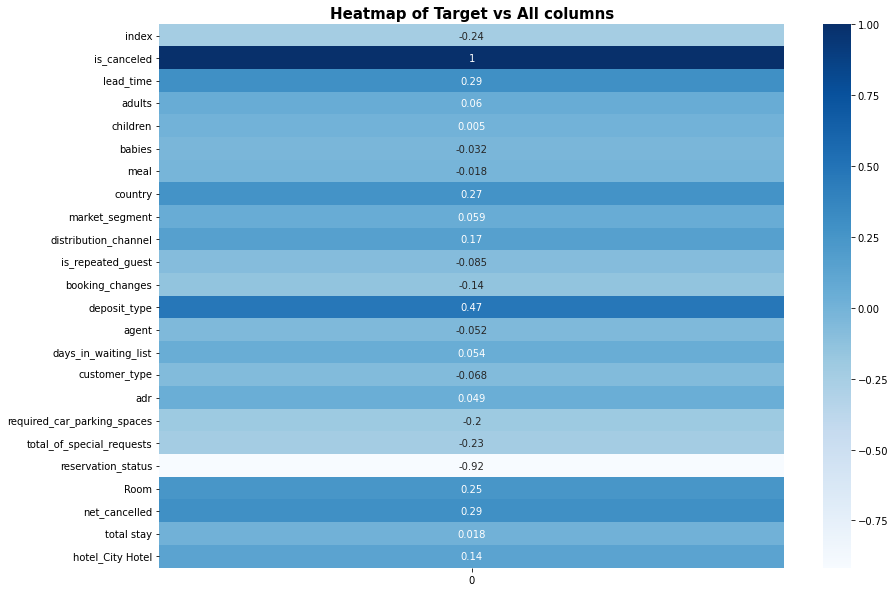

In [ ]:
#correlations of target column with other columns
plt.figure(figsize=(14,10))
corr=data1.corrwith(data1['is_canceled']).iloc[:-1].to_frame()
sns.heatmap(corr,cmap='Blues',annot=True)
plt.title('Heatmap of Target vs All columns',fontweight="bold", size=15)
plt.show()

In [ ]:
#Pie plot of Type of Hotels
hotels_type = data['hotel'].value_counts()
hotels_type


City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

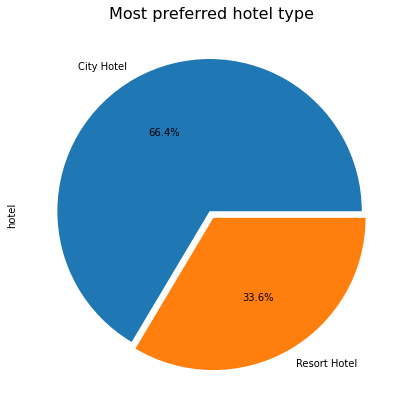

In [ ]:
explode = (0.025, 0.025)
plot = hotels_type.plot.pie(x = 'City Hotel', y='Resort Hotel', autopct='%1.1f%%', figsize=(14, 7),explode=explode)
plt.title('Most preferred hotel type',fontsize=16)
plt.show()

In [ ]:
#Pie plot of Type of Cancellation Ratio
canceled = data1['is_canceled'].value_counts()
canceled


0    75166
1    44224
Name: is_canceled, dtype: int64

In [ ]:
#Calculating the Cancelled verses Not Cancelled in the dataset and plotting it
Cancelled = data1[data1['is_canceled'] == 1]
Not_cancelled = data1[data1['is_canceled'] == 0]
su=[len(Cancelled)/len(data1)*100.0,len(Not_cancelled)/len(data1)*100.0]
print('Percentage of Cancelled and Not_cancelled',su)

Percentage of Cancelled and Not_cancelled [37.041628277075134, 62.958371722924866]


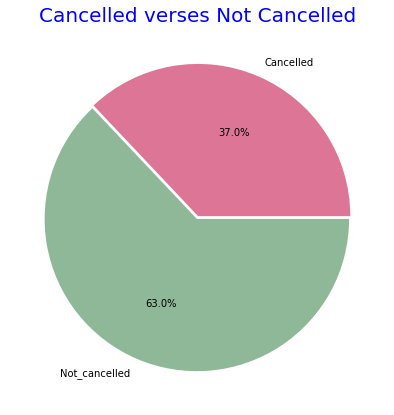

In [ ]:
uni=['Cancelled','Not_cancelled']
fig=plt.figure(figsize=(9,7))
color = ['#DD7596', '#8EB897']
plt.title('Cancelled verses Not Cancelled',size=20,color='blue')
plt.pie(su,labels=uni,autopct='%.1f%%',explode=[0.01]*2,colors=color)
plt.show()

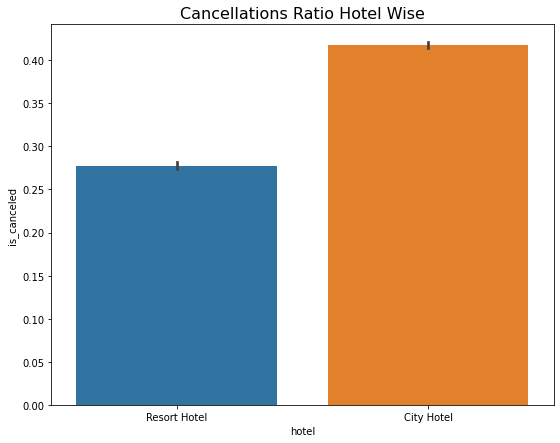

In [ ]:
fig=plt.figure(figsize=(9,7))
sns.barplot(x='hotel', y='is_canceled', data=data1)
plt.title('Cancellations Ratio Hotel Wise',fontsize=16)
plt.show()

In [ ]:
#Cancellations ratio is higher for city hotel than Resort hotel (0.28 to 0.41 percent)

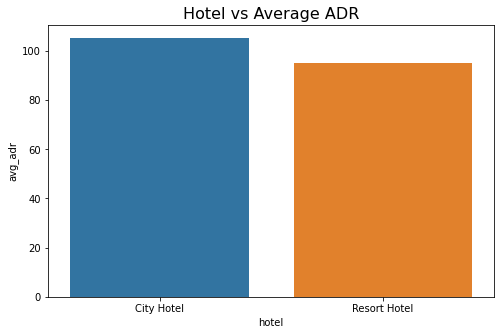

In [ ]:
grouped_by_hotel = data1.groupby('hotel')
d4 = grouped_by_hotel['adr'].agg(np.mean).reset_index().rename(columns = {'adr':'avg_adr'})   # calculating average adr
plt.figure(figsize = (8,5))
sns.barplot(x = d4['hotel'], y = d4['avg_adr'] )
plt.title('Hotel vs Average ADR',fontsize=16)
plt.show()

*City hotel generates high adr when compared to resort hotel*

In [ ]:
# Adding total staying days in hotels
data1['total_stay'] = data1['stays_in_weekend_nights']+data1['stays_in_week_nights']


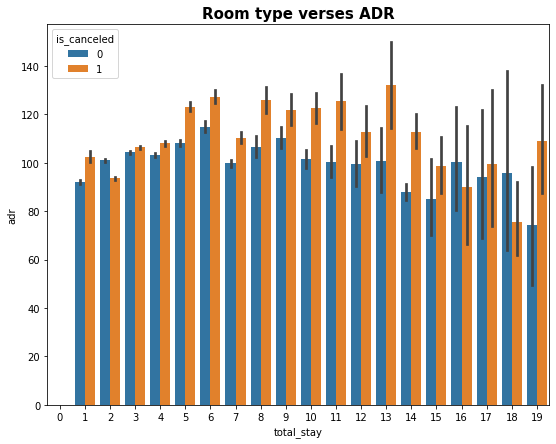

In [ ]:
fig=plt.figure(figsize=(9,7))
s1 = data1[data1['total_stay'] < 20]
sns.barplot(x = s1['total_stay'], y = data1['adr'],hue=data1['is_canceled'])
plt.title('Room type verses ADR',fontweight="bold", size=15)
plt.show()

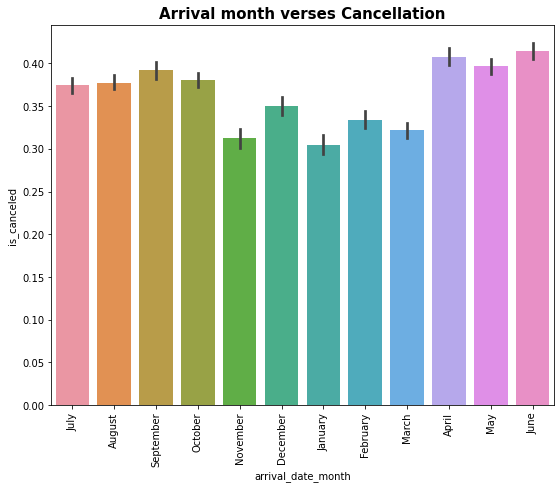

In [ ]:
fig=plt.figure(figsize=(9,7))
sns.barplot(x='arrival_date_month', y='is_canceled', data=data1)
plt.title('Arrival month verses Cancellation',fontweight="bold", size=15)
plt.xticks(rotation=90)
plt.show()

Maximum arrivals are in the month of april and may

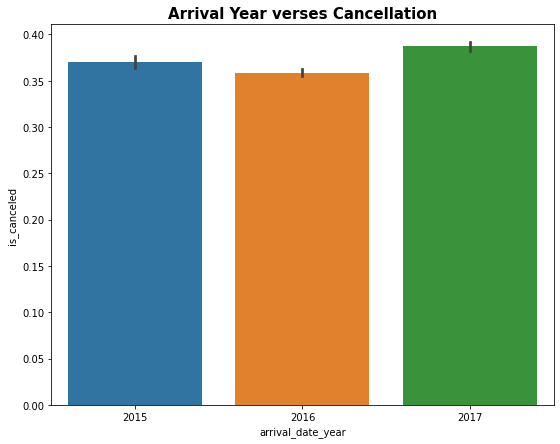

In [ ]:
fig=plt.figure(figsize=(9,7))
sns.barplot(x='arrival_date_year', y='is_canceled', data=data1)
plt.title('Arrival Year verses Cancellation',fontweight="bold", size=15)
plt.show()

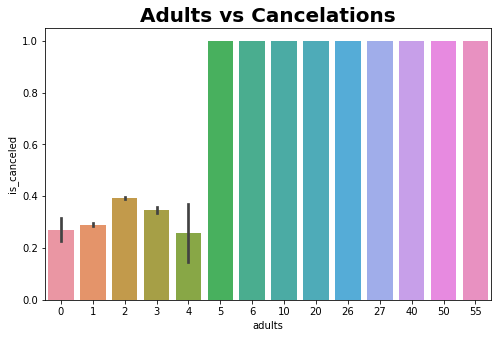

In [ ]:
fig=plt.figure(figsize=(8,5))
sns.barplot(x='adults', y='is_canceled', data=data1)
plt.title('Adults vs Cancelations',fontweight="bold", size=20)
plt.show()

In [ ]:
data1['adults'].unique()

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10])

In [ ]:
#Number of adults is 0 in some cases.

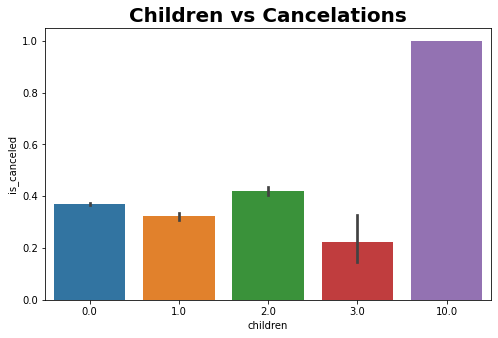

In [ ]:
fig=plt.figure(figsize=(8,5))
sns.barplot(x='children', y='is_canceled', data=data1)
plt.title('Children vs Cancelations',fontweight="bold", size=20)
plt.show()

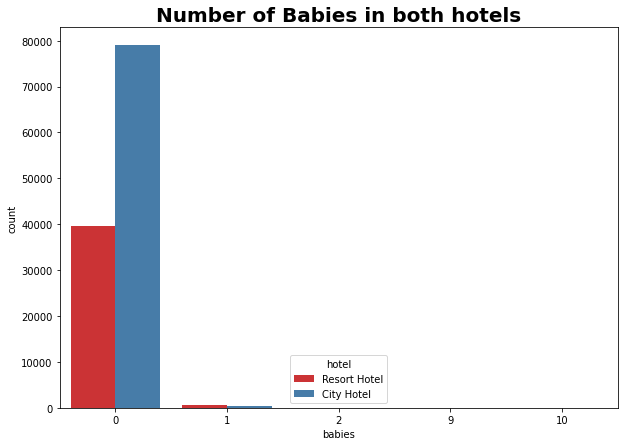

In [ ]:
plt.figure(figsize=(10, 7))
sns.countplot(x='babies',hue='hotel', data=data, palette='Set1')
plt.title("Number of Babies in both hotels",fontweight="bold", size=20)
plt.show()

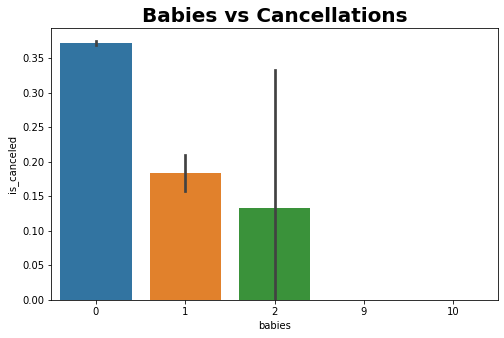

In [ ]:
fig=plt.figure(figsize=(8,5))
sns.barplot(x='babies', y='is_canceled', data=data1)
plt.title('Babies vs Cancellations',fontweight="bold", size=20)
plt.show()

In [ ]:
# Adding total people num as column, i.e. total people num = num of adults + children + babies
data1['total_people'] = data1['adults']+data1['children']+data1['babies']

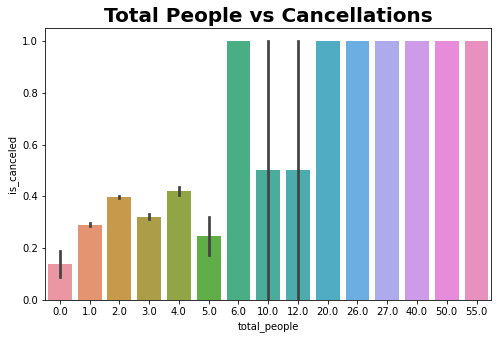

In [ ]:
#Plotting Total People vs Cancellations
fig=plt.figure(figsize=(8,5))
sns.barplot(x='total_people', y='is_canceled', data=data1)
plt.title('Total People vs Cancellations',fontweight="bold", size=20)
plt.show()

In [ ]:
data1['previous_cancellations'].unique()

array([ 0,  1,  2,  3, 26, 25, 14,  4, 24, 19,  5, 21,  6, 13, 11])

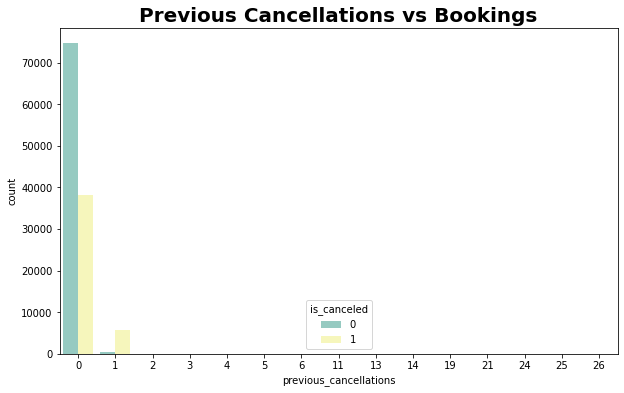

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data = data1, x = 'previous_cancellations', hue='is_canceled', palette='Set3')
plt.title('Previous Cancellations vs Bookings',fontweight="bold", size=20)
plt.show()

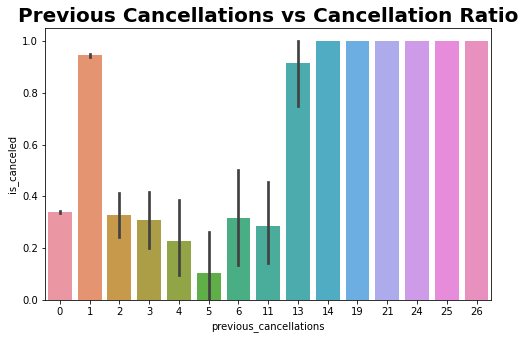

In [ ]:
fig=plt.figure(figsize=(8,5))
sns.barplot(x='previous_cancellations', y='is_canceled', data=data1)
plt.title('Previous Cancellations vs Cancellation Ratio',fontweight="bold", size=20)
plt.show()

In [ ]:
data1['previous_bookings_not_canceled'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 19, 26, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72])

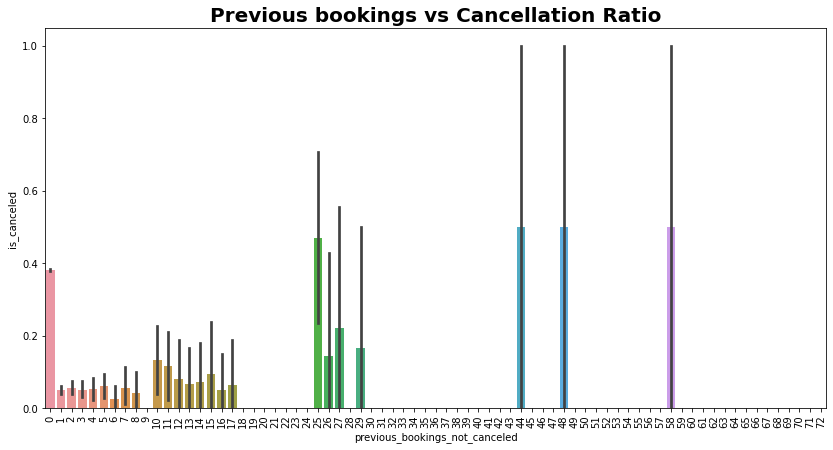

In [ ]:
fig=plt.figure(figsize=(14,7))
sns.barplot(x='previous_bookings_not_canceled', y='is_canceled', data=data1)
plt.xticks(rotation='90')
plt.title('Previous bookings vs Cancellation Ratio',fontweight="bold", size=20)
plt.show()

For further analysis, Select only those booking which did not get cancelled.

In [ ]:
data_bookings = data1[data1['is_canceled'] == 0]
data_cancelled = data1[data1['is_canceled'] == 1]

*Most of the customers come from Portugal, Great Britain, France and Spain.*

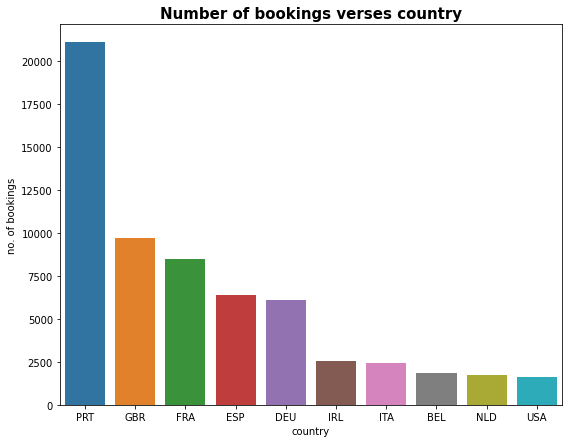

In [ ]:
grp_by_country = data_bookings.groupby('country')
d2 = pd.DataFrame(grp_by_country.size()).rename(columns = {0:'no. of bookings'}).sort_values('no. of bookings', ascending = False)
d2 = d2[:10]
fig=plt.figure(figsize=(9,7))
sns.barplot(x = d2.index, y = d2['no. of bookings'])
plt.title('Number of bookings verses country',fontweight="bold", size=15)
plt.show()

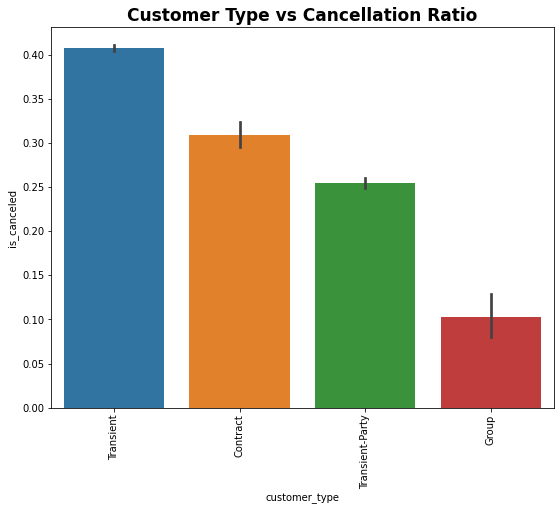

In [ ]:
fig=plt.figure(figsize=(9,7))
sns.barplot(x='customer_type', y='is_canceled', data=data1)
plt.xticks(rotation='90')
plt.title('Customer Type vs Cancellation Ratio',fontweight="bold", size=17)
plt.show()

Most cancellations are from Transient type

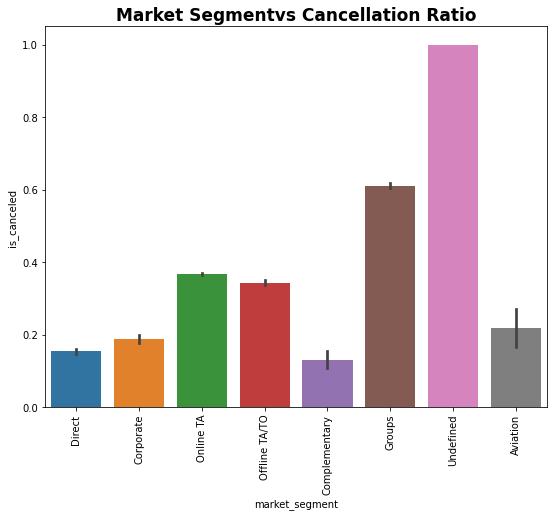

In [ ]:
fig=plt.figure(figsize=(9,7))
sns.barplot(x='market_segment', y='is_canceled', data=data1)
plt.xticks(rotation='90')
plt.title('Market Segmentvs Cancellation Ratio',fontweight="bold", size=17)
plt.show()

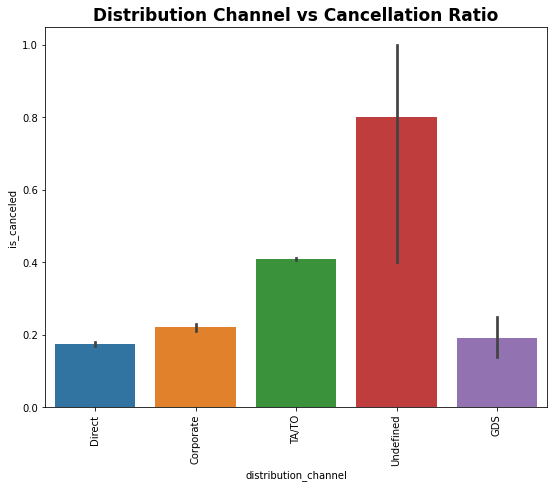

In [ ]:
fig=plt.figure(figsize=(9,7))
sns.barplot(x='distribution_channel', y='is_canceled', data=data1)
plt.xticks(rotation='90')
plt.title('Distribution Channel vs Cancellation Ratio',fontweight="bold", size=17)
plt.show()

Most cancellation ratio is from undefined Distribution Channel

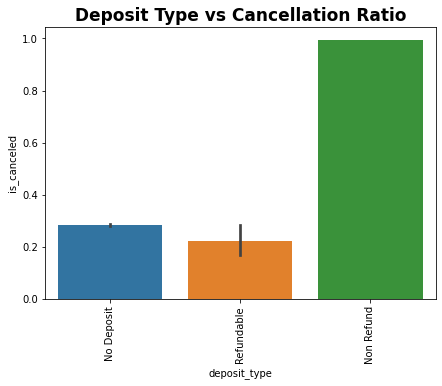

In [ ]:
fig=plt.figure(figsize=(7,5))
sns.barplot(x='deposit_type', y='is_canceled', data=data1)
plt.xticks(rotation='90')
plt.title('Deposit Type vs Cancellation Ratio',fontweight="bold", size=17)
plt.show()

Most cancellation ratio is from Non refund type Deposit

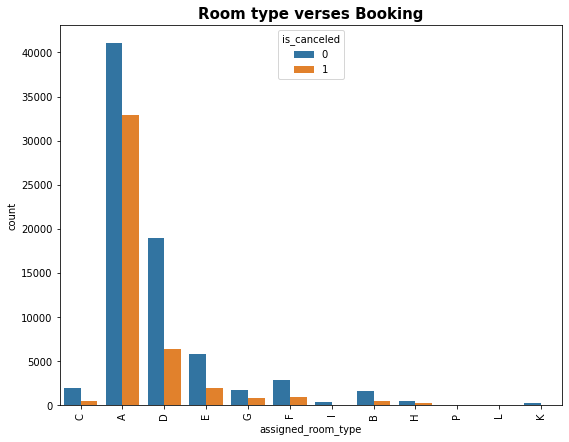

In [ ]:
fig=plt.figure(figsize=(9,7))
sns.countplot(x=data1["assigned_room_type"],hue=data1['is_canceled'])
plt.title('Room type verses Booking',fontweight="bold", size=15)
plt.xticks(rotation=90)
plt.show()

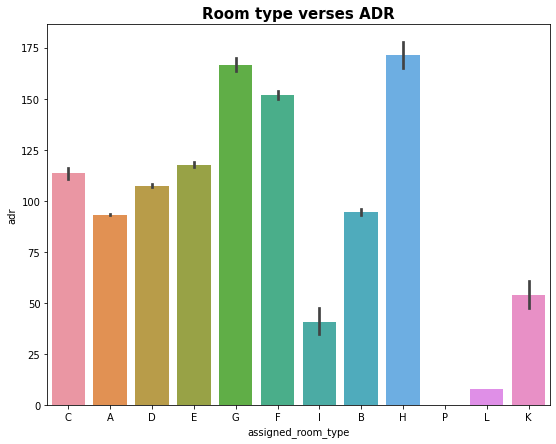

In [ ]:
fig=plt.figure(figsize=(9,7))
sns.barplot(x = data1['assigned_room_type'], y = data1['adr'])
plt.title('Room type verses ADR',fontweight="bold", size=15)
plt.show()

*Most demanded room type is A, but better adr rooms are of type H, G and F also. Hotels should increase the no. of room types G and H to maximise revenue.*

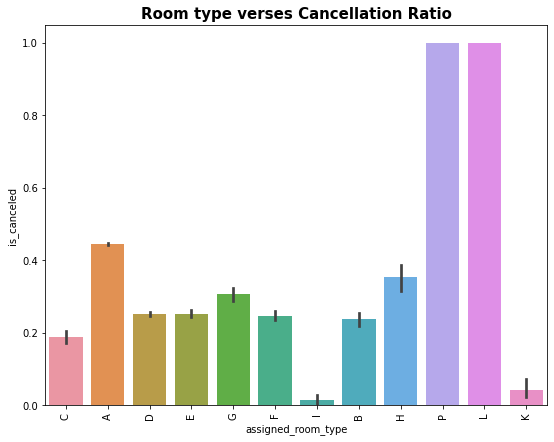

In [ ]:
fig=plt.figure(figsize=(9,7))
sns.barplot(x='assigned_room_type', y='is_canceled', data=data1)
plt.title('Room type verses Cancellation Ratio',fontweight="bold", size=15)
plt.xticks(rotation=90)
plt.show()

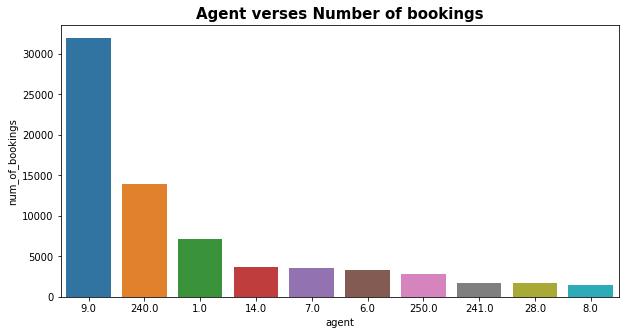

In [ ]:
d1 = pd.DataFrame(data1['agent'].value_counts()).reset_index().rename(columns = {'index':'agent','agent':'num_of_bookings'}).sort_values(by = 'num_of_bookings', ascending = False)
d2=d1.drop(d1[d1['agent'] == 0].index)            # 0 represents that booking is not made by an agent
d2= d2[:10]                                                   # Selecting top 10 performing agents
plt.figure(figsize = (10,5))
sns.barplot(x = 'agent', y = 'num_of_bookings', data = d2,order =d2.sort_values('num_of_bookings', ascending = False).agent)
plt.title('Agent verses Number of bookings',fontweight="bold", size=15) 
plt.show()

*Agent Number 9 has mostnumber of bookings followed by agent number 240.*

In [ ]:
waiting_bookings = data1[data1['days_in_waiting_list'] !=0]  # Selecting bookings with non zero waiting time


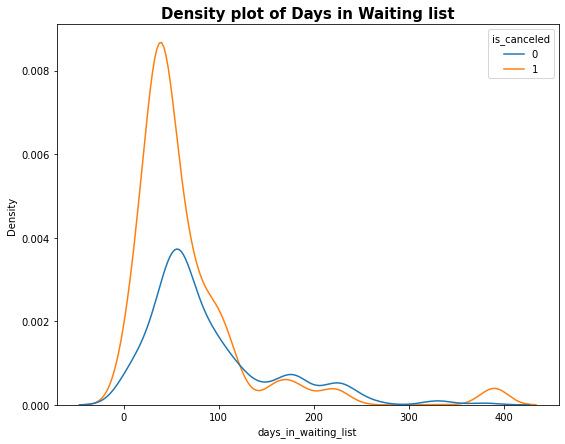

In [ ]:
plt.figure(figsize = (9, 7))
sns.kdeplot(x = 'days_in_waiting_list', hue = 'is_canceled' , data = waiting_bookings)
plt.title('Density plot of Days in Waiting list',fontweight="bold", size=15) 
plt.show()

*We see that most of the bookings that are cancelled have waiting period of less 150 days but also most of bookings that are not cancelled also have waiting period less than 150 days. Hence this shows that waiting period has no effect on cancellation of bookings.*

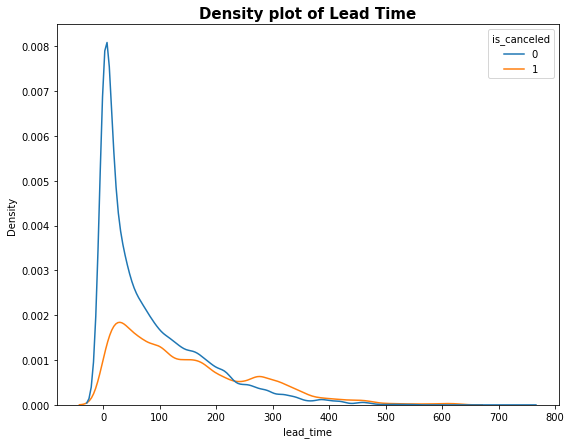

In [ ]:
plt.figure(figsize = (9, 7))
sns.kdeplot( x = data1['lead_time'], hue = data1['is_canceled'])
plt.title('Density plot of Lead Time',fontweight="bold", size=15) 
plt.show()

*We see that most of the bookings that are cancelled have a lead of less 150 days but also most of bookings that are not cancelled also have lad time less than 150 days. Hence this shows that lead time has no effect on cancellation of bookings.*

ADR verses Total Stay in Days

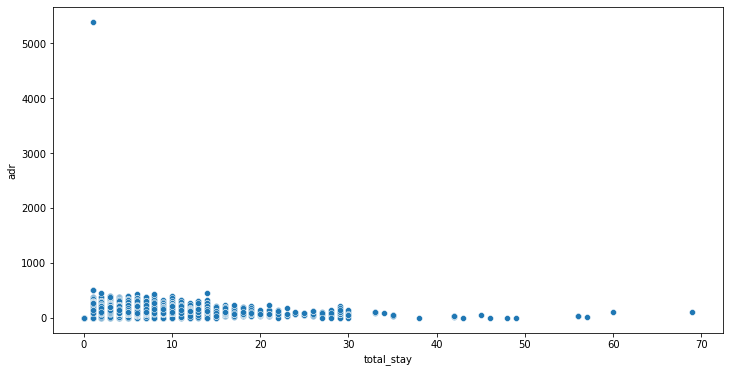

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = data1)
plt.show()

There is an outlier in adr, so we will removethat to get a better scatter plot.

In [ ]:
data1.drop(data1[data1['adr'] > 5000].index,inplace=True)

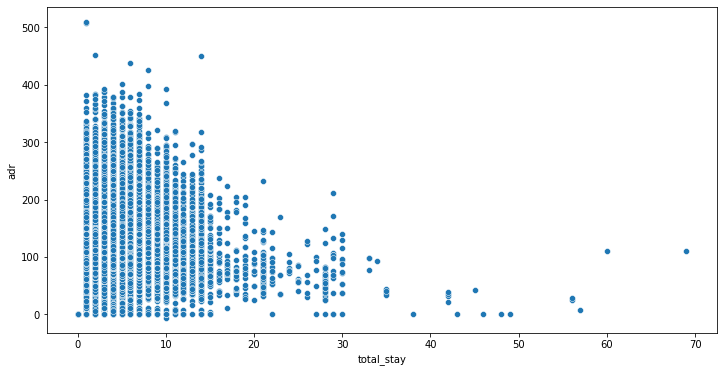

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = data1)
plt.show()

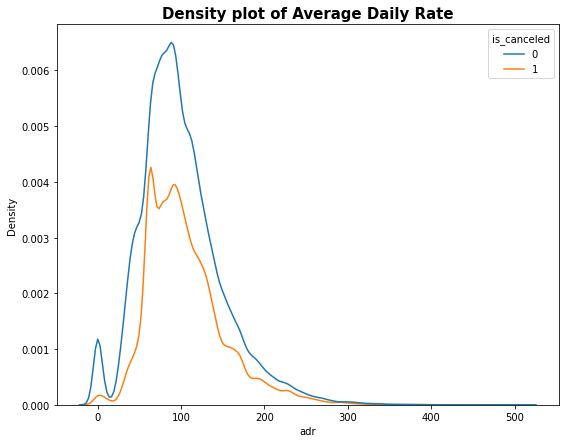

In [ ]:
plt.figure(figsize = (9, 7))
sns.kdeplot( x = data1['adr'], hue = data1['is_canceled'])
plt.title('Density plot of Average Daily Rate',fontweight="bold", size=15) 
plt.show()

*We see that most of the bookings that are cancelled have a adr of less 100  but also most of bookings that are not cancelled also have adr time less than 100 days. Hence this shows that adr has no effect on cancellation of bookings.*

***

# PRE PROCESSING

**MISSING VALUE HANDLING**

In [ ]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [ ]:
# Selecting duplicate rows except first
# occurrence based on all columns
duplicate = data1[data1.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_people
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2,2.0
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,250.0,0,Transient,84.67,0,1,Check-Out,2015-07-07,6,2.0
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,250.0,0,Transient,137.00,0,1,Check-Out,2015-07-07,5,2.0
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,240.0,0,Transient,97.00,0,0,Canceled,2015-07-01,1,2.0
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,240.0,0,Transient,109.80,0,3,Check-Out,2015-07-08,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,9.0,0,Transient,126.00,0,2,Check-Out,2017-09-03,3,2.0
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,9.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03,3,3.0
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,9.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03,3,3.0
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,9.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03,3,3.0


In [ ]:
#Mising Value handling
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
#Fields with mising value are agent,children and country 

In [ ]:
#Checking data types of fields
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

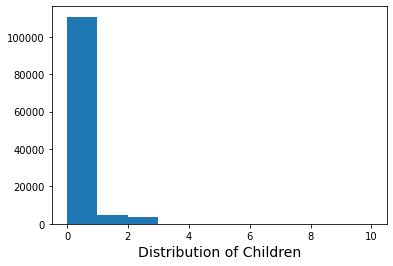

In [ ]:
plt.hist(data['children'])
plt.xlabel('Distribution of Children',size=14)
plt.show()

In [ ]:
#The distribution is right skewed.So replace missing values with median.
data["children"]=data["children"].fillna(data['children'].median())
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

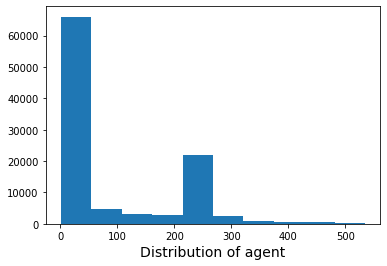

In [ ]:
plt.hist(data['agent'])
plt.xlabel('Distribution of agent',size=14)
plt.show()

In [ ]:
#The distribution is right skewed.So replace missing values with median.
data["agent"]=data["agent"].fillna(data['agent'].median())
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                                  0
company         

In [ ]:
#Since country is a categorical variable ,replace missing values with mode
data['country']=data["country"].fillna(data['country'].mode()[0])
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                                  0
company         

**CONVERTING DATA TYPE**

In [ ]:
#Checking data types of fields
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [ ]:
#Converting data type of children from float to int
data[['children', 'agent']] = data[['children',  'agent']].astype('int64')

**FEATURE REDUCTION & FEATURE EXTRACTION**




In [ ]:
#Removing features which are not relevant
data1=data.drop(['name','email','phone-number','credit_card'],axis=1)

In [ ]:
#Company column contains large number of missing values.So dropping it.
data1=data1.drop('company',axis=1)

In [ ]:
## Remove the less important features
data1 = data1.drop(['arrival_date_year','arrival_date_week_number','arrival_date_day_of_month','arrival_date_month','reservation_status_date'],axis=1)

In [ ]:
data1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status'],
      dtype='object')

In [ ]:
## Make the new column which contain 1 if guest received the same room which was reserved otherwise 0
data1['Room'] = 0
data1.loc[ data1['reserved_room_type'] == data1['assigned_room_type'] , 'Room'] = 1


## Make the new column which contain 1 if the guest has cancelled more booking in the past
## than the number of booking he did not cancel, otherwise 0

data1['net_cancelled'] = 0
data1.loc[ data1['previous_cancellations'] > data1['previous_bookings_not_canceled'] , 'net_cancelled'] = 1

In [ ]:
##Make a new column total stay
data1['total stay']= data1['stays_in_weekend_nights']+data1['stays_in_week_nights']

In [ ]:
#Dropping reserved_room_type,assigned_room_type,stays_in_weekend_nights,stays_in_week_nights columns as it is not needed further.
data1=data1.drop(['reserved_room_type','assigned_room_type','stays_in_weekend_nights','stays_in_week_nights'],axis=1)

In [ ]:
data1=data1.drop(['previous_cancellations','previous_bookings_not_canceled'],axis=1)

**CONTINOUS DATA SET**

In [ ]:
data1.dtypes

hotel                           object
is_canceled                      int64
lead_time                        int64
adults                           int64
children                         int64
babies                           int64
meal                            object
country                         object
market_segment                  object
distribution_channel            object
is_repeated_guest                int64
booking_changes                  int64
deposit_type                    object
agent                            int64
days_in_waiting_list             int64
customer_type                   object
adr                            float64
required_car_parking_spaces      int64
total_of_special_requests        int64
reservation_status              object
Room                             int64
net_cancelled                    int64
total stay                       int64
dtype: object

In [ ]:
data_cont=data1. select_dtypes(include = ['float']) 
data_cont.head()

,adr
0,0.0
1,0.0
2,75.0
3,75.0
4,98.0


**ENCODING**

In [ ]:
#Label encoding
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
label_enc=LabelEncoder()
#label encoding country
data1['country']=label_enc.fit_transform(data1['country'])


In [ ]:

#label encoding customer type
data1['customer_type']=label_enc.fit_transform(data1['customer_type'])

In [ ]:
data1['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [ ]:

#label encode meal
data1['meal']=label_enc.fit_transform(data1['meal'])

In [ ]:
#checking for unique values in Reservation status column
data1['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [ ]:
#label encode reservation_status
data1['reservation_status']=label_enc.fit_transform(data1['reservation_status'])

In [ ]:
data1['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [ ]:
data1.dtypes

hotel                           object
is_canceled                      int64
lead_time                        int64
adults                           int64
children                         int64
babies                           int64
meal                             int64
country                          int64
market_segment                  object
distribution_channel            object
is_repeated_guest                int64
booking_changes                  int64
deposit_type                    object
agent                            int64
days_in_waiting_list             int64
customer_type                    int64
adr                            float64
required_car_parking_spaces      int64
total_of_special_requests        int64
reservation_status               int64
Room                             int64
net_cancelled                    int64
total stay                       int64
dtype: object

In [ ]:
#label encoding market_segment     distribution_channel     deposit_type  
data1['market_segment']=label_enc.fit_transform(data1['market_segment'])
data1['distribution_channel']=label_enc.fit_transform(data1['distribution_channel'])
data1['deposit_type']=label_enc.fit_transform(data1['deposit_type'])                                           

In [ ]:
#checking for unique values in Hotel Type column
data1['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
#One hot encoding Hotel column as it has only 2 unique values
data1=pd.get_dummies(data1)

In [ ]:
data1.dtypes

is_canceled                      int64
lead_time                        int64
adults                           int64
children                         int64
babies                           int64
meal                             int64
country                          int64
market_segment                   int64
distribution_channel             int64
is_repeated_guest                int64
booking_changes                  int64
deposit_type                     int64
agent                            int64
days_in_waiting_list             int64
customer_type                    int64
adr                            float64
required_car_parking_spaces      int64
total_of_special_requests        int64
reservation_status               int64
Room                             int64
net_cancelled                    int64
total stay                       int64
hotel_City Hotel                 uint8
hotel_Resort Hotel               uint8
dtype: object

**OUTLIER HANDLING**

Outliers are checked in Continuous numerical columns. There are is only continous numerical column 'ADR'. The outliers are found out using IQR method

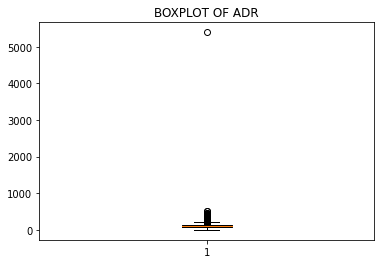

In [ ]:
plt.boxplot(data1['adr'])
plt.title('BOXPLOT OF ADR')
plt.show()

In [ ]:
Q1=np.percentile(data1['adr'],25,interpolation='midpoint')
Q2=np.percentile(data1['adr'],50,interpolation='midpoint')
Q3=np.percentile(data1['adr'],75,interpolation='midpoint')
print(Q1,Q2,Q3)

69.29 94.575 126.0


In [ ]:
data1['adr'].median()

94.575

In [ ]:
IQR=Q3-Q1
IQR

56.709999999999994

In [ ]:
low_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(low_limit)
print(upper_limit)

-15.774999999999991
211.065


In [ ]:
ind=data1['adr']==5400
data1.loc[ind].index

Int64Index([48515], dtype='int64')

In [ ]:
data1['adr'].describe()

count    119390.000000
mean        101.831122
std          50.535790
min          -6.380000
25%          69.290000
50%          94.575000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

In [ ]:
ind2=data1['adr']<0
data1.loc[ind2].index

Int64Index([14969], dtype='int64')

In [ ]:
#The value 5400 is an outlier and is far higher than the rest of the values, and dropping values less than 0 
#so keeping only rows less than 5400 and greater than 0 in the dataset
data1=data1.drop([48515,14969])

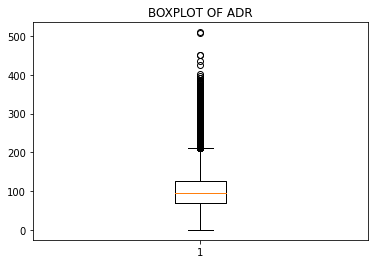

In [ ]:
plt.boxplot(data1['adr'])
plt.title('BOXPLOT OF ADR')
plt.show()

In [ ]:
data1.shape

(119388, 24)

In [ ]:
data1 = data1.reset_index()

**SCALING**

In [ ]:
#Standard Scaling of adr
data_cont1=data1. select_dtypes(include = ['float']) 
data_cont1.head()


,adr
0,0.0
1,0.0
2,75.0
3,75.0
4,98.0


In [ ]:
from sklearn import  preprocessing
std_scl=preprocessing.StandardScaler()
data_cont1=std_scl.fit_transform(data_cont1)


In [ ]:
data_cont1=pd.DataFrame(data_cont1,columns=['adr'])

In [ ]:
data_cont1.shape

(119388, 1)

In [ ]:
data1.shape

(119388, 25)

In [ ]:
data2=data1.drop('adr',axis=1)

In [ ]:
data2.shape

(119388, 24)

In [ ]:
data2=pd.concat([data2,data_cont1],axis=1)

In [ ]:
data2.shape

(119388, 25)

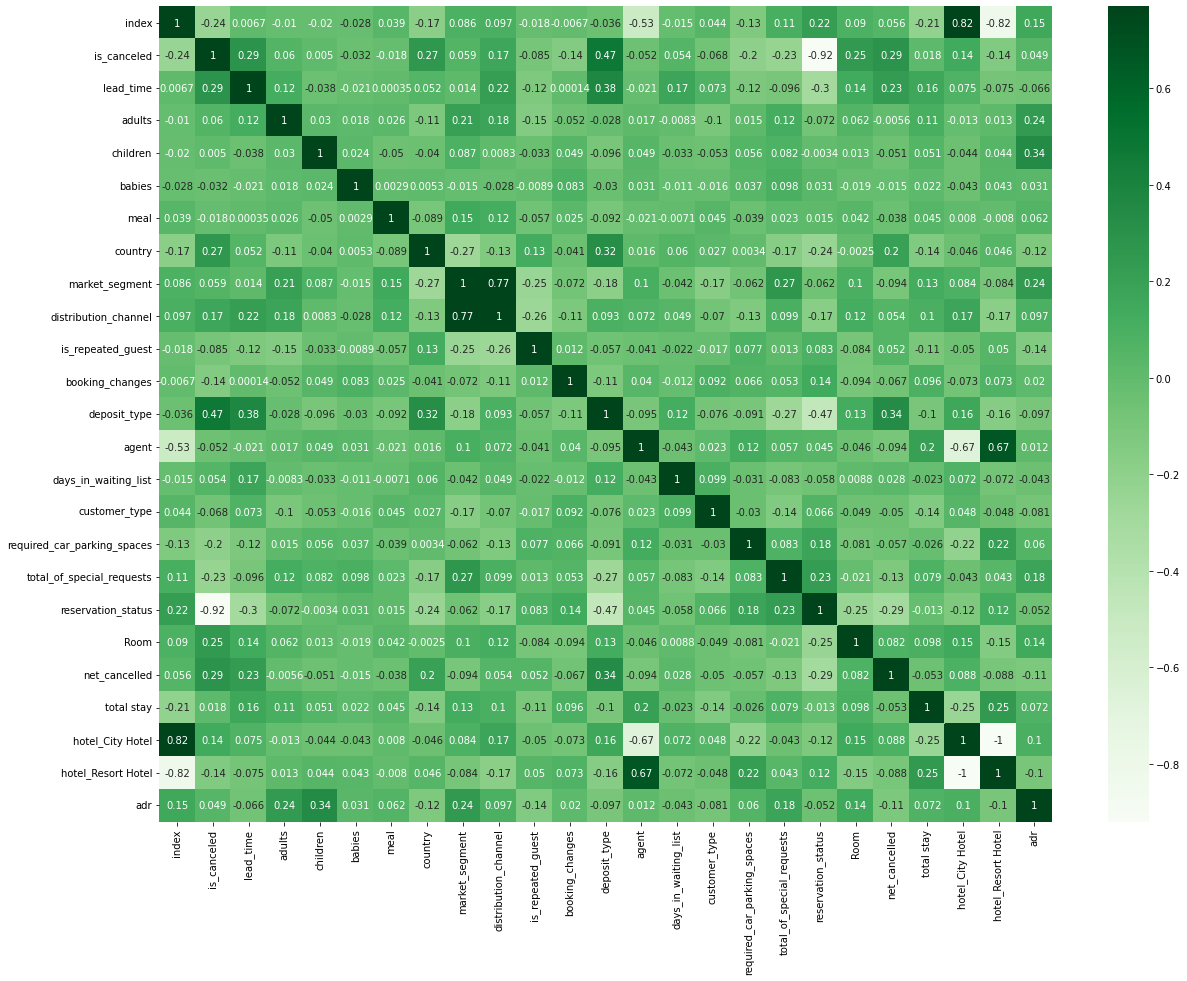

In [ ]:
#Lets see the correlation between all variables in dataset
plt.figure(figsize=(20,15))
sns.heatmap(data2.corr(),annot=True,cmap='Greens',vmax=0.77,vmin=-0.92)
plt.show()

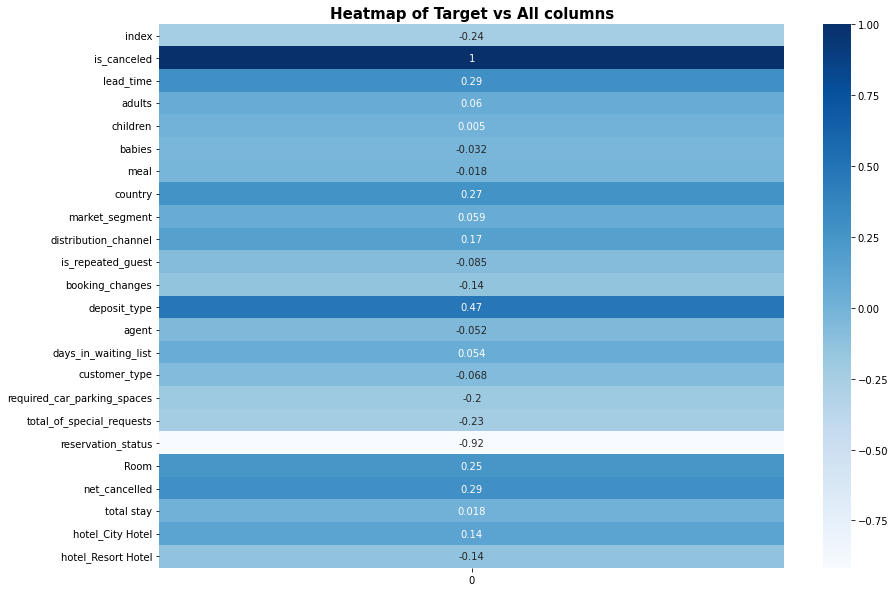

In [ ]:
#correlations of target column with other columns
plt.figure(figsize=(14,10))
corr=data2.corrwith(data2['is_canceled']).iloc[:-1].to_frame()
sns.heatmap(corr,cmap='Blues',annot=True)
plt.title('Heatmap of Target vs All columns',fontweight="bold", size=15)
plt.show()

In [ ]:
#Maximum correaltion is 0.47 and miniumum value is -0.92 which is for reservation  status column which can be dropped.

**PCA**

In [ ]:
#There is only 1 continuos column in the dataset so PCA is not possible in the dataset

In [ ]:
data3=data2.drop(['index'],axis=1)

In [ ]:
data3.columns

Index(['is_canceled', 'lead_time', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status', 'Room',
       'net_cancelled', 'total stay', 'hotel_City Hotel', 'hotel_Resort Hotel',
       'adr'],
      dtype='object')

In [ ]:
data3.shape

(119388, 24)

***

# MODEL BUILDING

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
data4=data3.drop('country',axis=1)

In [ ]:
#Removing feature with lowest correlation value
data5=data4.drop('reservation_status',axis=1)

In [ ]:
#Spliiting the model into features and target
X=data5.drop('is_canceled',axis=1)
Y=data5['is_canceled']

In [ ]:
X.columns

Index(['lead_time', 'adults', 'children', 'babies', 'meal', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'booking_changes',
       'deposit_type', 'agent', 'days_in_waiting_list', 'customer_type',
       'required_car_parking_spaces', 'total_of_special_requests', 'Room',
       'net_cancelled', 'total stay', 'hotel_City Hotel', 'hotel_Resort Hotel',
       'adr'],
      dtype='object')

In [ ]:
#Importing model checking Metrics
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from sklearn.metrics import precision_score,recall_score

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

Decision Tree Model

In [ ]:
dtc = DecisionTreeClassifier()
model1=dtc.fit(X_train, Y_train)

y_pred_dtc = model1.predict(X_test)

acc_dtc = accuracy_score(Y_test, y_pred_dtc)
conf = confusion_matrix(Y_test, y_pred_dtc)
clf_report = classification_report(Y_test, y_pred_dtc)

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree is : 0.8280564210808457
Confusion Matrix : 
[[16107  2592]
 [ 2540  8608]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.86      0.86      0.86     18699
           1       0.77      0.77      0.77     11148

    accuracy                           0.83     29847
   macro avg       0.82      0.82      0.82     29847
weighted avg       0.83      0.83      0.83     29847



Random Forest

In [ ]:
rd_clf = RandomForestClassifier()
model2=rd_clf.fit(X_train, Y_train)

y_pred_rd_clf = model2.predict(X_test)

acc_rd_clf = accuracy_score(Y_test, y_pred_rd_clf)
conf = confusion_matrix(Y_test, y_pred_rd_clf)
clf_report = classification_report(Y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 0.8628672898448755
Confusion Matrix : 
[[17162  1537]
 [ 2556  8592]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.87      0.92      0.89     18699
           1       0.85      0.77      0.81     11148

    accuracy                           0.86     29847
   macro avg       0.86      0.84      0.85     29847
weighted avg       0.86      0.86      0.86     29847



Logistic Regression

In [ ]:
lr = LogisticRegression()
model3=lr.fit(X_train, Y_train)

y_pred_lr = model3.predict(X_test)

acc_lr = accuracy_score(Y_test, y_pred_lr)
conf = confusion_matrix(Y_test, y_pred_lr)
clf_report = classification_report(Y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 0.7700606426106477
Confusion Matrix : 
[[17144  1555]
 [ 5308  5840]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.76      0.92      0.83     18699
           1       0.79      0.52      0.63     11148

    accuracy                           0.77     29847
   macro avg       0.78      0.72      0.73     29847
weighted avg       0.77      0.77      0.76     29847



kNN Algorithm

In [ ]:
knn = KNeighborsClassifier()
model4=knn.fit(X_train, Y_train)

y_pred_knn = model4.predict(X_test)

acc_knn = accuracy_score(Y_test, y_pred_knn)
conf = confusion_matrix(Y_test, y_pred_knn)
clf_report = classification_report(Y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of KNN is : 0.8054745870606761
Confusion Matrix : 
[[16090  2609]
 [ 3197  7951]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.83      0.86      0.85     18699
           1       0.75      0.71      0.73     11148

    accuracy                           0.81     29847
   macro avg       0.79      0.79      0.79     29847
weighted avg       0.80      0.81      0.80     29847



GradientBoosting

In [ ]:
gb = GradientBoostingClassifier()
model5=gb.fit(X_train, Y_train)

y_pred_gb = model5.predict(X_test)

acc_gb = accuracy_score(Y_test, y_pred_gb)
conf = confusion_matrix(Y_test, y_pred_gb)
clf_report = classification_report(Y_test, y_pred_gb)

print(f"Accuracy Score of GradientBoosting Classifier is : {acc_gb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of GradientBoosting Classifier is : 0.8252755720842966
Confusion Matrix : 
[[17525  1174]
 [ 4041  7107]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.81      0.94      0.87     18699
           1       0.86      0.64      0.73     11148

    accuracy                           0.83     29847
   macro avg       0.84      0.79      0.80     29847
weighted avg       0.83      0.83      0.82     29847



 XGBClassifier

In [ ]:
xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180)
model6=xgb.fit(X_train, Y_train)

y_pred_xgb = model6.predict(X_test)

acc_xgb = accuracy_score(Y_test, y_pred_xgb)
conf = confusion_matrix(Y_test, y_pred_xgb)
clf_report = classification_report(Y_test, y_pred_xgb)

print(f"Accuracy Score of XGB Classifier is : {acc_xgb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of XGB Classifier is : 0.8434348510738098
Confusion Matrix : 
[[17479  1220]
 [ 3453  7695]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.84      0.93      0.88     18699
           1       0.86      0.69      0.77     11148

    accuracy                           0.84     29847
   macro avg       0.85      0.81      0.82     29847
weighted avg       0.85      0.84      0.84     29847



LGBMClassifier

In [ ]:
lgbm = LGBMClassifier(learning_rate = 1)
model7=lgbm.fit(X_train, Y_train)

y_pred_lgbm = model7.predict(X_test)

acc_lgbm = accuracy_score(Y_test, y_pred_lgbm)
conf = confusion_matrix(Y_test, y_pred_lgbm)
clf_report = classification_report(Y_test, y_pred_lgbm)

print(f"Accuracy Score of  LGBM Classifier is : {acc_lgbm}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of  LGBM Classifier is : 0.8361979428418267
Confusion Matrix : 
[[16784  1915]
 [ 2974  8174]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.85      0.90      0.87     18699
           1       0.81      0.73      0.77     11148

    accuracy                           0.84     29847
   macro avg       0.83      0.82      0.82     29847
weighted avg       0.83      0.84      0.83     29847



ExtraTreesClassifier

In [ ]:
etc = ExtraTreesClassifier()
model8=etc.fit(X_train, Y_train)

y_pred_etc = model8.predict(X_test)

acc_etc = accuracy_score(Y_test, y_pred_etc)
conf = confusion_matrix(Y_test, y_pred_etc)
clf_report = classification_report(Y_test, y_pred_etc)

print(f"Accuracy Score of Extra trees Classifier is : {acc_etc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Extra trees Classifier is : 0.8605890039199919
Confusion Matrix : 
[[17088  1611]
 [ 2550  8598]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     18699
           1       0.84      0.77      0.81     11148

    accuracy                           0.86     29847
   macro avg       0.86      0.84      0.85     29847
weighted avg       0.86      0.86      0.86     29847



AdaBoostClassifier

In [ ]:
ada = AdaBoostClassifier(base_estimator = dtc)
model9=ada.fit(X_train, Y_train)

y_pred_ada = model9.predict(X_test)

acc_ada = accuracy_score(Y_test, y_pred_ada)
conf = confusion_matrix(Y_test, y_pred_ada)
clf_report = classification_report(Y_test, y_pred_ada)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_ada}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.8457801454082488
Confusion Matrix : 
[[16770  1929]
 [ 2674  8474]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.86      0.90      0.88     18699
           1       0.81      0.76      0.79     11148

    accuracy                           0.85     29847
   macro avg       0.84      0.83      0.83     29847
weighted avg       0.84      0.85      0.84     29847



In [ ]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier', 'XgBoost', 'Extra Trees Classifier', 'LGBM' ],
    'Score' : [acc_lr, acc_knn, acc_dtc, acc_rd_clf, acc_ada, acc_gb, acc_xgb, acc_etc, acc_lgbm]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,Random Forest Classifier,0.862867
7,Extra Trees Classifier,0.860589
4,Ada Boost Classifier,0.845780
6,XgBoost,0.843435
8,LGBM,0.836198
2,Decision Tree Classifier,0.828056
5,Gradient Boosting Classifier,0.825276
1,KNN,0.805475
0,Logistic Regression,0.770061


CROSS VALIDATION OF MODELS

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kfoldvalidator=KFold(10)

In [ ]:
for train_index,test_index in kfoldvalidator.split(X,Y):
    print('Training Index:',train_index)
    print("Testing Index:",test_index)


Training Index: [ 11939  11940  11941 ... 119385 119386 119387]
Testing Index: [    0     1     2 ... 11936 11937 11938]
Training Index: [     0      1      2 ... 119385 119386 119387]
Testing Index: [11939 11940 11941 ... 23875 23876 23877]
Training Index: [     0      1      2 ... 119385 119386 119387]
Testing Index: [23878 23879 23880 ... 35814 35815 35816]
Training Index: [     0      1      2 ... 119385 119386 119387]
Testing Index: [35817 35818 35819 ... 47753 47754 47755]
Training Index: [     0      1      2 ... 119385 119386 119387]
Testing Index: [47756 47757 47758 ... 59692 59693 59694]
Training Index: [     0      1      2 ... 119385 119386 119387]
Testing Index: [59695 59696 59697 ... 71631 71632 71633]
Training Index: [     0      1      2 ... 119385 119386 119387]
Testing Index: [71634 71635 71636 ... 83570 83571 83572]
Training Index: [     0      1      2 ... 119385 119386 119387]
Testing Index: [83573 83574 83575 ... 95509 95510 95511]
Training Index: [     0      1  

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv_result1=cross_val_score(model1,X,Y,cv=kfoldvalidator)
cv_result1

array([0.46243404, 0.76924366, 0.73021191, 0.68514951, 0.57048329,
       0.55482034, 0.78934584, 0.70768071, 0.65756408, 0.48952923])

In [ ]:
cv1=np.mean(cv_result1)
print('KFold Cross Validation score of Decison Tree Model is:',cv1)

KFold Cross Validation score of Decison Tree Model is: 0.641646260937394


In [ ]:
#Model2
cv_result2=cross_val_score(model2,X,Y,cv=kfoldvalidator)
cv2=np.mean(cv_result2)
print('KFold Cross Validation score of Gradient boosting is:',cv2)

KFold Cross Validation score of Gradient boosting is: 0.6782332885808887


In [ ]:
#Model3
cv_result3=cross_val_score(model3,X,Y,cv=kfoldvalidator)
cv3=np.mean(cv_result3)
print('KFold Cross Validation score of Logistic Regression Model is:',cv3)

KFold Cross Validation score of Logistic Regression Model is: 0.6656458247557657


In [ ]:
#Model4-KNN Model Cross validation
cv_result4=cross_val_score(model4,X,Y,cv=kfoldvalidator)
cv4=np.mean(cv_result4)
print('KFold Cross Validation score of KNN Model is:',cv4)

KFold Cross Validation score of KNN Model is: 0.5705015714059172


In [ ]:
#Model5
cv_result5=cross_val_score(model5,X,Y,cv=kfoldvalidator)
cv5=np.mean(cv_result5)
print('KFold Cross Validation score of Random Forest Classifier is:',cv5)

KFold Cross Validation score of Random Forest Classifier is: 0.7541051982412804


In [ ]:
#Model6
cv_result6=cross_val_score(model6,X,Y,cv=kfoldvalidator)
cv6=np.mean(cv_result6)
print('KFold Cross Validation score of XGBoost Classifier is:',cv6)

KFold Cross Validation score of XGBoost Classifier is: 0.7360371201173957


In [ ]:
#Model7
cv_result7=cross_val_score(model7,X,Y,cv=kfoldvalidator)
cv7=np.mean(cv_result7)
print('KFold Cross Validation score of LGBM Classifier is:',cv7)

KFold Cross Validation score of LGBM Classifier is: 0.6862409477472962


In [ ]:
#Model8
cv_result8=cross_val_score(model8,X,Y,cv=kfoldvalidator)
cv8=np.mean(cv_result8)
print('KFold Cross Validation score of Extra Trees Classifier is:',cv8)

KFold Cross Validation score of Extra Trees Classifier is: 0.6701003801490435


In [ ]:
#Model9
cv_result9=cross_val_score(model9,X,Y,cv=kfoldvalidator)
cv9=np.mean(cv_result9)
print('KFold Cross Validation score of Adaboost Classifier is:',cv9)

KFold Cross Validation score of Adaboost Classifier is: 0.6556009080391079


In [ ]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier', 'XgBoost', 'Extra Trees Classifier', 'LGBM' ],
    'Score' : [cv3, cv4, cv1, cv5, cv9, cv2, cv6, cv8, cv7]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,Random Forest Classifier,0.754105
6,XgBoost,0.736037
8,LGBM,0.686241
5,Gradient Boosting Classifier,0.678233
7,Extra Trees Classifier,0.670100
0,Logistic Regression,0.665646
4,Ada Boost Classifier,0.655601
2,Decision Tree Classifier,0.641646
1,KNN,0.570502


CROSS VALIDATION USING STRATIFIED K FOLD

In [ ]:
from sklearn.model_selection import StratifiedKFold
s_fold=StratifiedKFold(n_splits=10)
for train_index,test_index in s_fold.split(X,Y):
  print('Training Index:',train_index)
  print("Testing Index:",test_index)

Training Index: [  7781   7782   7783 ... 119385 119386 119387]
Testing Index: [    0     1     2 ... 18406 18407 18408]
Training Index: [     0      1      2 ... 119385 119386 119387]
Testing Index: [ 7781  7782  7783 ... 26133 26134 26135]
Training Index: [     0      1      2 ... 119385 119386 119387]
Testing Index: [12516 12517 12518 ... 46326 46327 46328]
Training Index: [     0      1      2 ... 119385 119386 119387]
Testing Index: [33671 33672 33673 ... 52060 52061 52062]
Training Index: [     0      1      2 ... 119385 119386 119387]
Testing Index: [41811 41812 41813 ... 80540 80541 80542]
Training Index: [     0      1      2 ... 119385 119386 119387]
Testing Index: [56694 56695 56696 ... 89279 89280 89281]
Training Index: [     0      1      2 ... 119385 119386 119387]
Testing Index: [61211 61212 61213 ... 96816 96817 96818]
Training Index: [     0      1      2 ... 119385 119386 119387]
Testing Index: [ 65636  65637  65638 ... 104338 104339 104340]
Training Index: [     0   

In [ ]:
from sklearn.model_selection import cross_val_score
cvs_result1=cross_val_score(model1,X,Y,cv=s_fold)
cvs1=np.mean(cvs_result1)
print('StratifiedKFold Cross Validation score of Decision Tree Model is:',cvs1)
     

StratifiedKFold Cross Validation score of Decision Tree Model is: 0.6687265146664529


In [ ]:
#Model2
cvs_result2=cross_val_score(model2,X,Y,cv=s_fold)
cvs2=np.mean(cvs_result2)
print('StratifiedKFold Cross Validation score of Gradientboosting is:',cvs2)

StratifiedKFold Cross Validation score of Gradientboosting is: 0.7145352019860942


In [ ]:
#Model3
cvs_result3=cross_val_score(model3,X,Y,cv=s_fold)
cvs3=np.mean(cvs_result3)
print('StratifiedKFold Cross Validation score of Logistic Regression Model is:',cvs3)

StratifiedKFold Cross Validation score of Logistic Regression Model is: 0.7383658338274008


In [ ]:
#Model4
cvs_result4=cross_val_score(model4,X,Y,cv=s_fold)
cvs4=np.mean(cvs_result4)
print('StratifiedKFold Cross Validation score of KNN is:',cvs4)

StratifiedKFold Cross Validation score of KNN is: 0.6075146009077725


In [ ]:
#Model5
cvs_result5=cross_val_score(model5,X,Y,cv=s_fold)
cvs5=np.mean(cvs_result5)
print('StratifiedKFold Cross Validation score of Random Forest Classifier is:',cvs5)

StratifiedKFold Cross Validation score of Random Forest Classifier is: 0.7970483480897781


In [ ]:
#Model6
cvs_result6=cross_val_score(model6,X,Y,cv=s_fold)
cvs6=np.mean(cvs_result6)
print('StratifiedKFold Cross Validation score of XGBoost classifier is:',cvs6)

StratifiedKFold Cross Validation score of XGBoost classifier is: 0.7782521915622036


In [ ]:
#Model7- LGBM stratified Cv score
cvs_result7=cross_val_score(model7,X,Y,cv=s_fold)
cvs7=np.mean(cvs_result7)
print('StratifiedKFold Cross Validation score of LGBM classifier is:',cvs7)

StratifiedKFold Cross Validation score of LGBM classifier is: 0.7428716739589758


In [ ]:
#Model8
cvs_result8=cross_val_score(model8,X,Y,cv=s_fold)
cvs8=np.mean(cvs_result8)
print('StratifiedKFold Cross Validation score of Extra Trees Classifier is:',cvs8)

StratifiedKFold Cross Validation score of Extra Trees Classifier is: 0.7073570056678493


In [ ]:
#Model9
cvs_result9=cross_val_score(model9,X,Y,cv=s_fold)
cvs9=np.mean(cvs_result9)
print('StratifiedKFold Cross Validation score of Adaboost Classifier is:',cvs9)

StratifiedKFold Cross Validation score of Adaboost Classifier is: 0.6847752573600001


In [ ]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier', 'XgBoost', 'Extra Trees Classifier', 'LGBM' ],
    'Score' : [cvs3, cvs4, cvs1, cvs5, cvs9, cvs2, cvs6, cvs8, cvs7]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,Random Forest Classifier,0.797048
6,XgBoost,0.778252
8,LGBM,0.742872
0,Logistic Regression,0.738366
5,Gradient Boosting Classifier,0.714535
7,Extra Trees Classifier,0.707357
4,Ada Boost Classifier,0.684775
2,Decision Tree Classifier,0.668727
1,KNN,0.607515


## Feature selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(X_train,Y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)
import matplotlib.pyplot as plt
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))


Feature 0: 8451.785830
Feature 1: 328.517689
Feature 2: 2.869710
Feature 3: 96.164555
Feature 4: 27.033706
Feature 5: 312.931085
Feature 6: 2572.407509
Feature 7: 641.828224
Feature 8: 1896.547470
Feature 9: 25268.849061
Feature 10: 230.119603
Feature 11: 271.998576
Feature 12: 423.949635
Feature 13: 3535.695198
Feature 14: 5140.617261
Feature 15: 5775.806438
Feature 16: 8381.540277
Feature 17: 43.094688
Feature 18: 1669.144801
Feature 19: 1669.144801
Feature 20: 203.371843


In [ ]:
X_train.columns

Index(['lead_time', 'adults', 'children', 'babies', 'meal', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'booking_changes',
       'deposit_type', 'agent', 'days_in_waiting_list', 'customer_type',
       'required_car_parking_spaces', 'total_of_special_requests', 'Room',
       'net_cancelled', 'total stay', 'hotel_City Hotel', 'hotel_Resort Hotel',
       'adr'],
      dtype='object')

In [ ]:
#Feature Selection scores
fs.scores_

array([8.45178583e+03, 3.28517689e+02, 2.86971008e+00, 9.61645554e+01,
       2.70337062e+01, 3.12931085e+02, 2.57240751e+03, 6.41828224e+02,
       1.89654747e+03, 2.52688491e+04, 2.30119603e+02, 2.71998576e+02,
       4.23949635e+02, 3.53569520e+03, 5.14061726e+03, 5.77580644e+03,
       8.38154028e+03, 4.30946878e+01, 1.66914480e+03, 1.66914480e+03,
       2.03371843e+02])

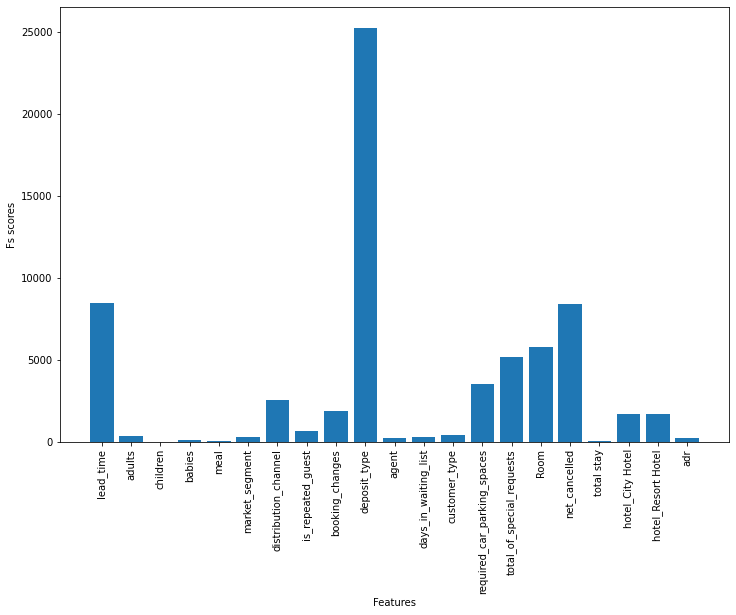

In [ ]:
df = pd.DataFrame(dict(
      names=['lead_time', 'adults', 'children', 'babies', 'meal', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'booking_changes',
       'deposit_type', 'agent', 'days_in_waiting_list', 'customer_type',
       'required_car_parking_spaces', 'total_of_special_requests', 'Room',
       'net_cancelled', 'total stay', 'hotel_City Hotel', 'hotel_Resort Hotel',
       'adr']))
plt.figure(figsize=(12,8))
plt.xlabel('Features')
plt.ylabel('Fs scores')
plt.xticks(rotation=90)
plt.bar('names',fs.scores_,data=df)
plt.show()

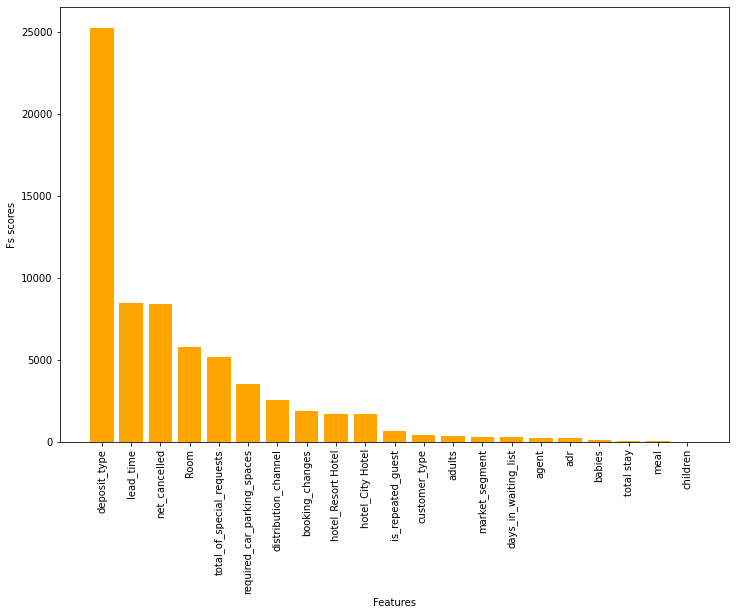

In [ ]:
plt.figure(figsize=(12,8))
df = pd.DataFrame(
   dict(
      names=['lead_time', 'adults', 'children', 'babies', 'meal', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'booking_changes',
       'deposit_type', 'agent', 'days_in_waiting_list', 'customer_type',
       'required_car_parking_spaces', 'total_of_special_requests', 'Room',
       'net_cancelled', 'total stay', 'hotel_City Hotel', 'hotel_Resort Hotel',
       'adr'],
      scores=[8.45178583e+03, 3.28517689e+02, 2.86971008e+00, 9.61645554e+01,
       2.70337062e+01, 3.12931085e+02, 2.57240751e+03, 6.41828224e+02,
       1.89654747e+03, 2.52688491e+04, 2.30119603e+02, 2.71998576e+02,
       4.23949635e+02, 3.53569520e+03, 5.14061726e+03, 5.77580644e+03,
       8.38154028e+03, 4.30946878e+01, 1.66914480e+03, 1.66914480e+03,
       2.03371843e+02]
   )
)
plt.xlabel('Features')
plt.ylabel('Fs scores')
plt.xticks(rotation=90)
df_sorted = df.sort_values('scores',ascending=False)
plt.bar('names', 'scores', data=df_sorted, color='orange')

plt.show()

So building  models with best 10 features  and comparing accuracy scores

10 features Gradient Boosting model

In [ ]:
#Spliiting the model into features and target
X5=data5.drop(['is_canceled','is_repeated_guest','customer_type','adults','market_segment','days_in_waiting_list','agent','adr','babies','total stay','meal','children'],axis=1)
Y5=data5['is_canceled']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X5,Y5,test_size=0.25,random_state=42)

In [ ]:
gb = GradientBoostingClassifier()
model_gb=gb.fit(X_train, Y_train)

y_pred_gb = model_gb.predict(X_test)

acc_gb_10 = accuracy_score(Y_test, y_pred_gb)
conf = confusion_matrix(Y_test, y_pred_gb)
clf_report = classification_report(Y_test, y_pred_gb)

print(f"Accuracy Score of GradientBoostingClassifier is : {acc_gb_10}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of GradientBoostingClassifier is : 0.7792407947197373
Confusion Matrix : 
[[16192  2507]
 [ 4082  7066]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.80      0.87      0.83     18699
           1       0.74      0.63      0.68     11148

    accuracy                           0.78     29847
   macro avg       0.77      0.75      0.76     29847
weighted avg       0.78      0.78      0.78     29847



10 features XGB CLasifier

In [ ]:
xgb2 = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180)
model_xgb=xgb2.fit(X_train, Y_train)

y_pred_xgb = model_xgb.predict(X_test)

acc_xgb_10 = accuracy_score(Y_test, y_pred_xgb)
conf = confusion_matrix(Y_test, y_pred_xgb)
clf_report = classification_report(Y_test, y_pred_xgb)

print(f"Accuracy Score of GradientBoostingClassifier is : {acc_xgb_10}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of GradientBoostingClassifier is : 0.7868797534090528
Confusion Matrix : 
[[16869  1830]
 [ 4531  6617]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.79      0.90      0.84     18699
           1       0.78      0.59      0.68     11148

    accuracy                           0.79     29847
   macro avg       0.79      0.75      0.76     29847
weighted avg       0.79      0.79      0.78     29847



10 features LGBM Classifier

In [ ]:
lgbm = LGBMClassifier(learning_rate = 1)
model_lgbm=lgbm.fit(X_train, Y_train)

y_pred_lgbm = model_lgbm.predict(X_test)

acc_lgbm_10 = accuracy_score(Y_test, y_pred_lgbm)
conf = confusion_matrix(Y_test, y_pred_lgbm)
clf_report = classification_report(Y_test, y_pred_lgbm)

print(f"Accuracy Score of  LGBM Classifier is : {acc_lgbm_10}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of  LGBM Classifier is : 0.7747512312795256
Confusion Matrix : 
[[16457  2242]
 [ 4481  6667]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.79      0.88      0.83     18699
           1       0.75      0.60      0.66     11148

    accuracy                           0.77     29847
   macro avg       0.77      0.74      0.75     29847
weighted avg       0.77      0.77      0.77     29847



10 features ExtraTreesClasifier

In [ ]:
etc = ExtraTreesClassifier()
model_extra=etc.fit(X_train, Y_train)

y_pred_etc = model_extra.predict(X_test)

acc_etc_10 = accuracy_score(Y_test, y_pred_etc)
conf = confusion_matrix(Y_test, y_pred_etc)
clf_report = classification_report(Y_test, y_pred_etc)

print(f"Accuracy Score of Extra trees Classifier is : {acc_etc_10}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Extra trees Classifier is : 0.7872818038663852
Confusion Matrix : 
[[16612  2087]
 [ 4262  6886]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.80      0.89      0.84     18699
           1       0.77      0.62      0.68     11148

    accuracy                           0.79     29847
   macro avg       0.78      0.75      0.76     29847
weighted avg       0.79      0.79      0.78     29847



10 features AdaboostClassifier

In [ ]:
ada = AdaBoostClassifier(base_estimator = dtc)
model_ada=ada.fit(X_train, Y_train)

y_pred_ada = model_ada.predict(X_test)

acc_ada_10 = accuracy_score(Y_test, y_pred_ada)
conf = confusion_matrix(Y_test, y_pred_ada)
clf_report = classification_report(Y_test, y_pred_ada)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_ada_10}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.7873488122759407
Confusion Matrix : 
[[16606  2093]
 [ 4254  6894]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.80      0.89      0.84     18699
           1       0.77      0.62      0.68     11148

    accuracy                           0.79     29847
   macro avg       0.78      0.75      0.76     29847
weighted avg       0.79      0.79      0.78     29847



10 features KNN

In [ ]:
knn = KNeighborsClassifier()
model_knn=knn.fit(X_train, Y_train)

y_pred_knn = model_knn.predict(X_test)

acc_knn_10 = accuracy_score(Y_test, y_pred_knn)
conf = confusion_matrix(Y_test, y_pred_knn)
clf_report = classification_report(Y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn_10}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of KNN is : 0.7654035581465474
Confusion Matrix : 
[[15916  2783]
 [ 4219  6929]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.79      0.85      0.82     18699
           1       0.71      0.62      0.66     11148

    accuracy                           0.77     29847
   macro avg       0.75      0.74      0.74     29847
weighted avg       0.76      0.77      0.76     29847



10 features Logistic Regression

In [ ]:
lr = LogisticRegression()
model_lr=lr.fit(X_train, Y_train)

y_pred_lr = model_lr.predict(X_test)

acc_lr_10 = accuracy_score(Y_test, y_pred_lr)
conf = confusion_matrix(Y_test, y_pred_lr)
clf_report = classification_report(Y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr_10}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 0.7668777431567662
Confusion Matrix : 
[[18269   430]
 [ 6528  4620]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.74      0.98      0.84     18699
           1       0.91      0.41      0.57     11148

    accuracy                           0.77     29847
   macro avg       0.83      0.70      0.71     29847
weighted avg       0.80      0.77      0.74     29847



10 features Decision Tree

In [ ]:
dtc = DecisionTreeClassifier()
model_dtc=dtc.fit(X_train, Y_train)

y_pred_dtc = model_dtc.predict(X_test)

acc_dtc_10 = accuracy_score(Y_test, y_pred_dtc)
conf = confusion_matrix(Y_test, y_pred_dtc)
clf_report = classification_report(Y_test, y_pred_dtc)

print(f"Accuracy Score of Decision Tree is : {acc_dtc_10}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree is : 0.7865112071564981
Confusion Matrix : 
[[16585  2114]
 [ 4258  6890]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.80      0.89      0.84     18699
           1       0.77      0.62      0.68     11148

    accuracy                           0.79     29847
   macro avg       0.78      0.75      0.76     29847
weighted avg       0.78      0.79      0.78     29847



10 features RandomForestClassifier

In [ ]:
rd_clf = RandomForestClassifier()
model_rfc=rd_clf.fit(X_train, Y_train)

y_pred_rd_clf = model_rfc.predict(X_test)

acc_rd_clf_10 = accuracy_score(Y_test, y_pred_rd_clf)
conf = confusion_matrix(Y_test, y_pred_rd_clf)
clf_report = classification_report(Y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf_10}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 0.7849700137367239
Confusion Matrix : 
[[16441  2258]
 [ 4160  6988]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.80      0.88      0.84     18699
           1       0.76      0.63      0.69     11148

    accuracy                           0.78     29847
   macro avg       0.78      0.75      0.76     29847
weighted avg       0.78      0.78      0.78     29847



In [ ]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier', 'XgBoost', 'Extra Trees Classifier', 'LGBM' ],
    'Score' : [acc_lr_10, acc_knn_10, acc_dtc_10,acc_ada_10,acc_rd_clf_10,acc_gb_10, acc_xgb_10, acc_etc_10, acc_lgbm_10]})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,Random Forest Classifier,0.787349
7,Extra Trees Classifier,0.787282
6,XgBoost,0.786880
2,Decision Tree Classifier,0.786511
4,Ada Boost Classifier,0.784970
5,Gradient Boosting Classifier,0.779241
8,LGBM,0.774751
0,Logistic Regression,0.766878
1,KNN,0.765404


Cross validation scores of 10 features 

KFOLD CROSS VALIDATION

In [ ]:
from sklearn.model_selection import KFold
kfoldvalidator=KFold(10)

In [ ]:
for train_index,test_index in kfoldvalidator.split(X5,Y5):
    print('Training Index:',train_index)
    print("Testing Index:",test_index)

Training Index: [ 11939  11940  11941 ... 119385 119386 119387]
Testing Index: [    0     1     2 ... 11936 11937 11938]
Training Index: [     0      1      2 ... 119385 119386 119387]
Testing Index: [11939 11940 11941 ... 23875 23876 23877]
Training Index: [     0      1      2 ... 119385 119386 119387]
Testing Index: [23878 23879 23880 ... 35814 35815 35816]
Training Index: [     0      1      2 ... 119385 119386 119387]
Testing Index: [35817 35818 35819 ... 47753 47754 47755]
Training Index: [     0      1      2 ... 119385 119386 119387]
Testing Index: [47756 47757 47758 ... 59692 59693 59694]
Training Index: [     0      1      2 ... 119385 119386 119387]
Testing Index: [59695 59696 59697 ... 71631 71632 71633]
Training Index: [     0      1      2 ... 119385 119386 119387]
Testing Index: [71634 71635 71636 ... 83570 83571 83572]
Training Index: [     0      1      2 ... 119385 119386 119387]
Testing Index: [83573 83574 83575 ... 95509 95510 95511]
Training Index: [     0      1  

In [ ]:
cv_result1=cross_val_score(model_dtc,X5,Y5,cv=kfoldvalidator)
cv_result1
cv1=np.mean(cv_result1)
print('KFold Cross Validation score of Decison Tree Model is:',cv1)

KFold Cross Validation score of Decison Tree Model is: 0.6631498973301921


In [ ]:
#Model2
cv_result2=cross_val_score(model_rfc,X5,Y5,cv=kfoldvalidator)
cv2=np.mean(cv_result2)
print('KFold Cross Validation score of Random Forest Model is:',cv3)

KFold Cross Validation score of Random Forest Model is: 0.7104258677090758


In [ ]:
#Model3
cv_result3=cross_val_score(model_lr,X5,Y5,cv=kfoldvalidator)
cv3=np.mean(cv_result3)
print('KFold Cross Validation score of Logistic Regression Model is:',cv2)

KFold Cross Validation score of Logistic Regression Model is: 0.6606118258403824


In [ ]:
#Model4
cv_result4=cross_val_score(model_knn,X5,Y5,cv=kfoldvalidator)
cv4=np.mean(cv_result4)
print('KFold Cross Validation score of KNN Model is:',cv4)

KFold Cross Validation score of KNN Model is: 0.6095914051339129


In [ ]:
#Model5
cv_result5=cross_val_score(model_gb,X5,Y5,cv=kfoldvalidator)
cv5=np.mean(cv_result5)
print('KFold Cross Validation score of Gradient boosting Model is:',cv5)

KFold Cross Validation score of Gradient boosting Model is: 0.6910180641132828


In [ ]:
#Model6
cv_result6=cross_val_score(model_xgb,X5,Y5,cv=kfoldvalidator)
cv6=np.mean(cv_result6)
print('KFold Cross Validation score of XGBoost Classifier is:',cv6)

KFold Cross Validation score of XGBoost Classifier is: 0.6713425246454757


In [ ]:
#Model7
cv_result7=cross_val_score(model_lgbm,X5,Y5,cv=kfoldvalidator)
cv7=np.mean(cv_result7)
print('KFold Cross Validation score of LGBM Classifier is:',cv7)

KFold Cross Validation score of LGBM Classifier is: 0.6571194912722349


In [ ]:
#Model8
cv_result8=cross_val_score(model_extra,X5,Y5,cv=kfoldvalidator)
cv8=np.mean(cv_result8)
print('KFold Cross Validation score of Extra Trees Classifier is:',cv8)

KFold Cross Validation score of Extra Trees Classifier is: 0.6606371072272772


In [ ]:
#Model9
cv_result9=cross_val_score(model_ada,X5,Y5,cv=kfoldvalidator)
cv9=np.mean(cv_result9)
print('KFold Cross Validation score of Adaboost Classifier is:',cv9)

KFold Cross Validation score of Adaboost Classifier is: 0.6635518715923048


In [ ]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier', 'XgBoost', 'Extra Trees Classifier', 'LGBM' ],
    'Kfold CV Score-10 features' : [cv2, cv4, cv1, cv3, cv9, cv5, cv6, cv8, cv7]
})


models.sort_values(by = 'Kfold CV Score-10 features', ascending = False)

,Model,Kfold CV Score-10 features
3,Random Forest Classifier,0.710426
5,Gradient Boosting Classifier,0.691018
6,XgBoost,0.671343
4,Ada Boost Classifier,0.663552
2,Decision Tree Classifier,0.663150
7,Extra Trees Classifier,0.660637
0,Logistic Regression,0.660612
8,LGBM,0.657119
1,KNN,0.609591


**Stratified K fold validation for 10 features**

In [ ]:
#Model1 Decision Tree
cvs_result1=cross_val_score(model_dtc,X5,Y5,cv=s_fold)
cvs2=np.mean(cvs_result1)
print('StratifiedKFold Cross Validation score of Decision Tree Model is:',cvs1)

StratifiedKFold Cross Validation score of Decision Tree Model is: 0.6687265146664529


In [ ]:
#Model2 Random Forest
cvs_result2=cross_val_score(model_rfc,X5,Y5,cv=s_fold)
cvs2=np.mean(cvs_result2)
print('StratifiedKFold Cross Validation score of Random Forest Model is:',cvs5)

StratifiedKFold Cross Validation score of Random Forest Model is: 0.7497161121892713


In [ ]:
#Model3 Logisitic Regression
cvs_result3=cross_val_score(model_lr,X5,Y5,cv=s_fold)
cvs3=np.mean(cvs_result3)
print('StratifiedKFold Cross Validation score of Logistic Regression Model is:',cvs3)

StratifiedKFold Cross Validation score of Logistic Regression Model is: 0.7490629735611827


In [ ]:
#Model4 KNN
cvs_result4=cross_val_score(model_knn,X5,Y5,cv=s_fold)
cvs4=np.mean(cvs_result4)
print('StratifiedKFold Cross Validation score of KNN is:',cvs4)

StratifiedKFold Cross Validation score of KNN is: 0.6316547001341816


In [ ]:
#Model5 Gradient Boosting
cvs_result5=cross_val_score(model_gb,X5,Y5,cv=s_fold)
cvs5=np.mean(cvs_result5)
print('StratifiedKFold Cross Validation score of GradientBoosting is:',cvs2)

StratifiedKFold Cross Validation score of GradientBoosting is: 0.7073579900373389


In [ ]:
#Model6 
cvs_result6=cross_val_score(model_xgb,X5,Y5,cv=s_fold)
cvs6=np.mean(cvs_result6)
print('StratifiedKFold Cross Validation score of XGBoost classifier is:',cvs6)

StratifiedKFold Cross Validation score of XGBoost classifier is: 0.7306350336666292


In [ ]:
#Model7
cvs_result7=cross_val_score(model_lgbm,X5,Y5,cv=s_fold)
cvs7=np.mean(cvs_result7)
print('StratifiedKFold Cross Validation score of LGBM classifier is:',cvs7)

StratifiedKFold Cross Validation score of LGBM classifier is: 0.7211200024146871


In [ ]:
#Model8
cvs_result8=cross_val_score(model_extra,X5,Y5,cv=s_fold)
cvs8=np.mean(cvs_result8)
print('StratifiedKFold Cross Validation score of Extra Trees Classifier is:',cvs8)

StratifiedKFold Cross Validation score of Extra Trees Classifier is: 0.7035635192863662


In [ ]:
#Model9
cvs_result9=cross_val_score(model_ada,X5,Y5,cv=s_fold)
cvs9=np.mean(cvs_result9)
print('StratifiedKFold Cross Validation score of Adaboost Classifier is:',cvs9)

StratifiedKFold Cross Validation score of Adaboost Classifier is: 0.7068052458712927


In [ ]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier', 'XgBoost', 'Extra Trees Classifier', 'LGBM' ],
    'Stratified-kfold CV Score-10 features' : [cvs3, cvs4, cvs1, cvs5, cvs9, cvs2, cvs6, cvs8, cvs7]
})


models.sort_values(by = 'Stratified-kfold CV Score-10 features', ascending = False)

,Model,Stratified-kfold CV Score-10 features
3,Random Forest Classifier,0.749716
0,Logistic Regression,0.749063
6,XgBoost,0.730635
8,LGBM,0.721120
5,Gradient Boosting Classifier,0.707358
4,Ada Boost Classifier,0.706805
7,Extra Trees Classifier,0.703564
2,Decision Tree Classifier,0.668727
1,KNN,0.631655


***HYPER PARAMETER TUNING***

In [ ]:
#Spliting the model into features and target
X5=data5.drop(['is_canceled','is_repeated_guest','customer_type','adults','market_segment','days_in_waiting_list','agent','adr','babies','total stay','meal','children'],axis=1)
Y5=data5['is_canceled']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X5,Y5,test_size=0.25,random_state=42)

In [ ]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [ ]:
## Importing Random Forest Classifier from the sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [ ]:
rf_random.fit(X_train, Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [ ]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}  



In [ ]:
#Using the best parameters

In [ ]:
rd_clf2 = RandomForestClassifier(n_estimators = 100, min_samples_split = 10, min_samples_leaf= 4, max_features = 'sqrt', max_depth= 20, bootstrap=True)
model_rfc2=rd_clf2.fit(X_train, Y_train)

y_pred_rd_clf2 = model_rfc2.predict(X_test)

acc_rd_clf_10_2 = accuracy_score(Y_test, y_pred_rd_clf2)
conf = confusion_matrix(Y_test, y_pred_rd_clf2)
clf_report = classification_report(Y_test, y_pred_rd_clf2)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf_10_2}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 0.7913023084397092
Confusion Matrix : 
[[16891  1808]
 [ 4421  6727]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.79      0.90      0.84     18699
           1       0.79      0.60      0.68     11148

    accuracy                           0.79     29847
   macro avg       0.79      0.75      0.76     29847
weighted avg       0.79      0.79      0.78     29847



In [ ]:
print(f"Accuracy Score of Random Forest before Tuning : {acc_rd_clf_10}")
print(f"Accuracy Score of Random Forest After Tuning : {acc_rd_clf_10_2}")

Accuracy Score of Random Forest before Tuning : 0.7849700137367239
Accuracy Score of Random Forest After Tuning : 0.7913023084397092


In [ ]:
print(f"Percentage Increase of Accuracy Score of Random Forest before and after Hyper Parametric Tuning : {((acc_rd_clf_10_2-acc_rd_clf_10))*100}")

Percentage Increase of Accuracy Score of Random Forest before and after Hyper Parametric Tuning : 0.6332294702985242


Saving the dataset with 10 features and target column for web deployment

In [ ]:
data6=data5.drop(['is_repeated_guest','customer_type','adults','market_segment','days_in_waiting_list','agent','adr','babies','total stay','meal','children'],axis=1)

In [ ]:
data6.shape

(119388, 11)

In [ ]:
data6.set_index('hotel_City Hotel', inplace=True)

In [ ]:
data6.to_csv('hotelbookingok.csv')

***
***